# K-means

이번 강의에서는 비지도학습의 대표적인 알고리즘인 K-means 에 대해 학습하도록 한다.

### 비지도학습

우리는 앞에서 지도학습을 두가지로 분류하여 (classification, regression) 공부하였다. 비지도 학습이란 정답을 따로 알려주지 않고(label이 없음), 비슷한 데이터들을 군집화 하는 것이라고 할 수 있다. 

즉 input vector 값들만(label 없음) 이용하여 유사한 데이터들끼리 군집화하는 것을 비지도 학습이라고 요약할 수 있다.  

K-menas 란 다차원의 input vector로 이루어진 데이터포인트들을 K개의 군집으로 군집화 한 알고리즘이라고 할 수 있다.

### K-means  용어

K 개의 평균값이 있다고 생각하면 이해하기 쉬우며, 이 평균값들은 우리는 centroid 라고 명명할 것이다. 
각 데이터포인터는 centroid와의 거리 계산을 통하여 가까운 centroid를 찾아서 가까운 centorid의 군집에 속한다고 가정한다. 이것이 K-means 알고리즘의 핵심이라고 할 수 있다.

### K-means 알고리즘 수행

K-means 는 다음과 같은 과정을 통해 수행된다.

1. 임의의 centroid 값을 기준으로 알고리즘을 실행(시작)
2. 각 데이터 포인트와 centroid 와의 거리를 비교하여 가장 가까운 centroid 찾음
3. centroid 를 업데이트 (주어진 군집에 속한 점들의 평균값을 이용하여 centroid 값 바꿈) 

2-3 번을 알고리즘을 일정한 단계까지 반복

K-means 를 (일정한 단계까지) 도달하여 멈추는 방법은 크게 두가지가 있는데, 하나는 centroid값이 더 이상 변경되지 않을 때까지 반복하는 방법과 나머지 하나는 max iteration 값을 설정하여 그 값까지 계속 방법하는 방법이다. 두 가지 방법 중에 선호하는 방법을 택하면 되며, 두 번째 방법이 간단하나, 검증을 해야 되는 단점이 있다.

## K-means 실행 및 구현

Scikit learn 을 통하여 k-means 를 먼저 간단히 실행해보고, 직접 구현해보도록 하자.

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

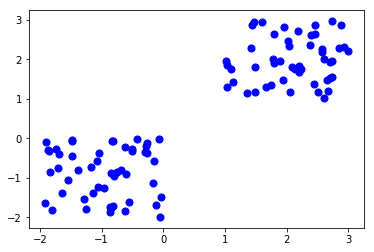

In [102]:
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.show()

In [103]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2) #클러스터 2개
Kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [104]:
Kmean.cluster_centers_

array([[-0.96094741, -0.85601682],
       [ 2.09651921,  1.98718204]])

In [105]:
Kmean.cluster_centers_[0]

array([-0.96094741, -0.85601682])

In [106]:
Kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

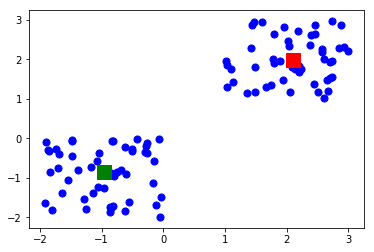

In [107]:
plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(Kmean.cluster_centers_[0][0],Kmean.cluster_centers_[0][1], s=200, c='g', marker='s')
plt.scatter(Kmean.cluster_centers_[1][0],Kmean.cluster_centers_[1][1], s=200, c='r', marker='s')
plt.show()

## K-means 직접 구현

먼저 데이터를 고객 데이터를 활용하도록 하자. 

In [108]:
dataset=pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


위 데이터에서 소득과 소비만 이용하여 K-means로 고객들을 군집화 한다고 하자. (왜 하는지, 한번 고민해보자)

In [109]:
X = dataset.iloc[:, [3, 4]].values #annual income과 spending score를 뽑아온다

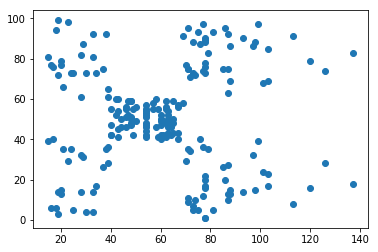

In [110]:
plt.scatter(X[:,0],X[:,1])

In [111]:
m=X.shape[0] # m은 데이터 포인트의 개수
n=X.shape[1] # n은 input vector 의 차원 (2차원)
n_iter=100 # set max iteration to 100

In [112]:
K=5 # number of cluster to 5

In [113]:
Centroids=np.array([]).reshape(n,0) 

In [114]:
Centroids

array([], shape=(2, 0), dtype=float64)

In [115]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [116]:
import random as rd

sampled_index = rd.sample(range(m),K)
print(sampled_index)
for i in range(K):
    #rand=rd.randint(0,m-1)
    rand = sampled_index[i]
    Centroids=np.c_[Centroids,X[rand]] #column 방향으로 쌓는다

[50, 132, 76, 137, 146]


In [117]:
Centroids

array([[42., 72., 54., 73., 77.],
       [52., 34., 53., 73., 36.]])

In [118]:
Centroids.shape

(2, 5)

In [119]:
EuclidianDistance=np.array([]).reshape(m,0) #데이터 포인트 만큼 배열을 생성함

for k in range(K):
    tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist] #centroid마다의 거리를 column으로 쌓는다
C=np.argmin(EuclidianDistance,axis=1)+1 #거리의 최소값이 어떤 인덱스 인지 알려줌

In [120]:
C

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3,
       3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 4, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 5, 4, 2, 4, 5, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 5, 4, 2, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4], dtype=int64)

In [121]:
print(EuclidianDistance[0])
print(np.argmin(EuclidianDistance[0]))

[ 898. 3274. 1717. 4520. 3853.]
0


In [122]:
Y={}
for k in range(K): #클러스터 수만큼 가지는 값들을 초기화
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m): #클러스터에 맞는 데이터 포인트들을 추가
    #print(C[i],X[i])
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K): #column단위로 되어있는 클러스터의 점들을 transpose한다
    Y[k+1]=Y[k+1].T
    
for k in range(K): #평균을 구한다
    print(np.mean(Y[k+1]))
    Centroids[:,k]=np.mean(Y[k+1],axis=0)

40.67910447761194
47.18
54.43478260869565
83.35365853658537
59.5


In [123]:
Y

{1: array([[15., 39.],
        [15., 81.],
        [16.,  6.],
        [16., 77.],
        [17., 40.],
        [17., 76.],
        [18.,  6.],
        [18., 94.],
        [19.,  3.],
        [19., 72.],
        [19., 14.],
        [19., 99.],
        [20., 15.],
        [20., 77.],
        [20., 13.],
        [20., 79.],
        [21., 35.],
        [21., 66.],
        [23., 29.],
        [23., 98.],
        [24., 35.],
        [24., 73.],
        [25.,  5.],
        [25., 73.],
        [28., 14.],
        [28., 82.],
        [28., 32.],
        [28., 61.],
        [29., 31.],
        [29., 87.],
        [30.,  4.],
        [30., 73.],
        [33.,  4.],
        [33., 92.],
        [33., 14.],
        [33., 81.],
        [34., 17.],
        [34., 73.],
        [37., 26.],
        [37., 75.],
        [38., 35.],
        [39., 36.],
        [39., 61.],
        [39., 28.],
        [39., 65.],
        [40., 55.],
        [40., 47.],
        [40., 42.],
        [40., 42.],
        [42., 52.

한번에 합쳐진것

[60, 183, 96, 59, 128]
[[25.72727273 86.53846154 55.2962963  26.30434783 88.2       ]
 [79.36363636 82.12820513 49.51851852 20.91304348 17.11428571]]


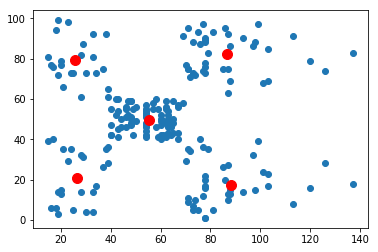

In [138]:
import matplotlib.animation as animation


dataset=pd.read_csv('Mall_Customers.csv')
dataset.head()
X = dataset.iloc[:, [3, 4]].values #annual income과 spending score를 뽑아온다

#실행값 초기화
m=X.shape[0] # m은 데이터 포인트의 개수
n=X.shape[1] # n은 input vector 의 차원 (2차원)
n_iter=100 # set max iteration to 100
K=5 # number of cluster to 5

import random as rd

sampled_index = rd.sample(range(m),K)
print(sampled_index)

#centroid 초기화
Centroids=np.array([]).reshape(n,0) 
for i in range(K):
    #rand=rd.randint(0,m-1)
    rand = sampled_index[i]
    Centroids=np.c_[Centroids,X[rand]] #column 방향으로 쌓는다
    

for iter in range(n_iter):
    EuclidianDistance=np.array([]).reshape(m,0) #데이터 포인트 만큼 배열을 생성함

    #centroid를 돌면서 
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist] #centroid마다의 거리를 column으로 쌓는다
    C=np.argmin(EuclidianDistance,axis=1)+1 #거리의 최소값이 어떤 인덱스 인지 알려줌 (클러스터 인덱스를 업데이트 한다)


    Y={}
    for k in range(K): #클러스터 수만큼 가지는 값들을 초기화
        Y[k+1]=np.array([]).reshape(2,0)
    for i in range(m): #클러스터에 맞는 데이터 포인트들을 추가
        #print(C[i],X[i])
        Y[C[i]]=np.c_[Y[C[i]],X[i]]

    for k in range(K): #column단위로 되어있는 클러스터의 점들을 transpose한다
        Y[k+1]=Y[k+1].T

    for k in range(K): #평균을 구한다
        #print(np.mean(Y[k+1]))
        Centroids[:,k]=np.mean(Y[k+1],axis=0)


#기존 데이터 점 찍기
plt.scatter(X[:,0],X[:,1])

#centroid 점 찍기
print(Centroids)
for k in range(K):
    plt.scatter(Centroids[0,k],Centroids[1,k],s=100,c="r")

In [125]:
for i in range(n_iter):
    #step 2.a
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
        C=np.argmin(EuclidianDistance,axis=1)+1
    #step 2.b
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
    for k in range(K):
        Y[k+1]=Y[k+1].T
    
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0)
        
    print(Centroids)
    Output=Y

[[86.53846154 30.92857143 87.         24.58333333 48.48453608]
 [82.12820513 35.07142857 18.63157895  9.58333333 56.93814433]]
[[86.53846154 30.92857143 87.         24.58333333 48.48453608]
 [82.12820513 35.07142857 18.63157895  9.58333333 56.93814433]]
[[86.53846154 30.92857143 87.         24.58333333 48.48453608]
 [82.12820513 35.07142857 18.63157895  9.58333333 56.93814433]]
[[86.53846154 30.92857143 87.         24.58333333 48.48453608]
 [82.12820513 35.07142857 18.63157895  9.58333333 56.93814433]]
[[86.53846154 30.92857143 87.         24.58333333 48.48453608]
 [82.12820513 35.07142857 18.63157895  9.58333333 56.93814433]]
[[86.53846154 30.92857143 87.         24.58333333 48.48453608]
 [82.12820513 35.07142857 18.63157895  9.58333333 56.93814433]]
[[86.53846154 30.92857143 87.         24.58333333 48.48453608]
 [82.12820513 35.07142857 18.63157895  9.58333333 56.93814433]]
[[86.53846154 30.92857143 87.         24.58333333 48.48453608]
 [82.12820513 35.07142857 18.63157895  9.5833333

[[86.53846154 30.92857143 87.         24.58333333 48.48453608]
 [82.12820513 35.07142857 18.63157895  9.58333333 56.93814433]]
[[86.53846154 30.92857143 87.         24.58333333 48.48453608]
 [82.12820513 35.07142857 18.63157895  9.58333333 56.93814433]]
[[86.53846154 30.92857143 87.         24.58333333 48.48453608]
 [82.12820513 35.07142857 18.63157895  9.58333333 56.93814433]]
[[86.53846154 30.92857143 87.         24.58333333 48.48453608]
 [82.12820513 35.07142857 18.63157895  9.58333333 56.93814433]]
[[86.53846154 30.92857143 87.         24.58333333 48.48453608]
 [82.12820513 35.07142857 18.63157895  9.58333333 56.93814433]]
[[86.53846154 30.92857143 87.         24.58333333 48.48453608]
 [82.12820513 35.07142857 18.63157895  9.58333333 56.93814433]]
[[86.53846154 30.92857143 87.         24.58333333 48.48453608]
 [82.12820513 35.07142857 18.63157895  9.58333333 56.93814433]]
[[86.53846154 30.92857143 87.         24.58333333 48.48453608]
 [82.12820513 35.07142857 18.63157895  9.5833333

In [126]:
Output

{1: array([[ 69.,  91.],
        [ 70.,  77.],
        [ 71.,  95.],
        [ 71.,  75.],
        [ 71.,  75.],
        [ 72.,  71.],
        [ 73.,  88.],
        [ 73.,  73.],
        [ 74.,  72.],
        [ 75.,  93.],
        [ 76.,  87.],
        [ 77.,  97.],
        [ 77.,  74.],
        [ 78.,  90.],
        [ 78.,  88.],
        [ 78.,  76.],
        [ 78.,  89.],
        [ 78.,  78.],
        [ 78.,  73.],
        [ 79.,  83.],
        [ 81.,  93.],
        [ 85.,  75.],
        [ 86.,  95.],
        [ 87.,  63.],
        [ 87.,  75.],
        [ 87.,  92.],
        [ 88.,  86.],
        [ 88.,  69.],
        [ 93.,  90.],
        [ 97.,  86.],
        [ 98.,  88.],
        [ 99.,  97.],
        [101.,  68.],
        [103.,  85.],
        [103.,  69.],
        [113.,  91.],
        [120.,  79.],
        [126.,  74.],
        [137.,  83.]]), 2: array([[15., 39.],
        [17., 40.],
        [21., 35.],
        [23., 29.],
        [24., 35.],
        [28., 32.],
        [29., 3